# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [19]:
import pandas as pd

In [137]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [138]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [4]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [174]:
df_seoul_bus_station = pd.read_csv('../미니프로젝트 1차_실습파일/seoul_bus_station_info.csv')
df_seoul_moving = pd.read_csv('../미니프로젝트 1차_실습파일/seoul_moving_info.csv')
df_seoul_business = pd.read_csv('../미니프로젝트 1차_실습파일/seoul_business_info.csv')
df_seoul_people = pd.read_csv('../미니프로젝트 1차_실습파일/seoul_people_info.csv')

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [190]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')
# df = pd.merge(df,seoul_moving,how='inner', on='도착 시군구 코드')

In [176]:
df.head()

,도착 시군구 코드,자치구,남자,여자,합계,한식 일반 음식점업.1,용달 화물자동차 운송업.1,부동산 중개 및 대리업.1,커피전문점.1,두발미용업.1,...,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,종로구,71890,78563,150453,5912,646,889,3613,480,...,356,105,4500874,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46
1,11020,중구,63495,68298,131793,6414,333,1152,3542,816,...,173,102,3138112,3050645,113.699710,110.530616,58.450528,44.128266,28733286,21692705.49
2,11030,용산구,109826,117280,227106,2987,466,1214,2076,777,...,326,69,3495720,3422432,119.962938,117.447907,58.494740,34.245515,26487237,15506848.68
3,11040,성동구,137620,147146,284766,2785,1161,1453,1859,851,...,432,58,2371151,2331836,90.495039,88.994581,58.879851,39.001257,27279447,18069555.27
4,11050,광진구,167562,183618,351180,2861,985,1313,1887,1337,...,274,43,2365355,2382437,107.491706,108.267985,61.807174,42.697635,26804906,18517366.67


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   도착 시군구 코드          25 non-null     int64  
 1   자치구                25 non-null     object 
 2   남자                 25 non-null     int64  
 3   여자                 25 non-null     int64  
 4   합계                 25 non-null     int64  
 5   한식 일반 음식점업.1       25 non-null     int64  
 6   용달 화물자동차 운송업.1     25 non-null     int64  
 7   부동산 중개 및 대리업.1     25 non-null     int64  
 8   커피전문점.1            25 non-null     int64  
 9   두발미용업.1            25 non-null     int64  
 10  남녀용 겉옷 및 셔츠 도매업.1  25 non-null     int64  
 11  택시운송업.1            25 non-null     int64  
 12  기타주점업.1            25 non-null     int64  
 13  일반 교과 학원.1         25 non-null     int64  
 14  한식 육류요리 전문점.1      25 non-null     int64  
 15  정류장수               25 non-null     int64  
 16  노선수                25 non-nu

In [191]:
df['총 이동 시간/총 이동인구'] = df['총 이동 시간'] / df['총 이동인구']
df['승차평균승객수/평균 이동 시간(분)'] = df['승차평균승객수'] / df['평균 이동 시간(분)']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   도착 시군구 코드            25 non-null     int64  
 1   자치구                  25 non-null     object 
 2   남자                   25 non-null     int64  
 3   여자                   25 non-null     int64  
 4   합계                   25 non-null     int64  
 5   한식 일반 음식점업.1         25 non-null     int64  
 6   용달 화물자동차 운송업.1       25 non-null     int64  
 7   부동산 중개 및 대리업.1       25 non-null     int64  
 8   커피전문점.1              25 non-null     int64  
 9   두발미용업.1              25 non-null     int64  
 10  남녀용 겉옷 및 셔츠 도매업.1    25 non-null     int64  
 11  택시운송업.1              25 non-null     int64  
 12  기타주점업.1              25 non-null     int64  
 13  일반 교과 학원.1           25 non-null     int64  
 14  한식 육류요리 전문점.1        25 non-null     int64  
 15  정류장수                 25 non-null     int64

In [146]:
df_2 = df.loc[:, ['도착 시군구 코드', '자치구', '한식 일반 음식점업.1', '용달 화물자동차 운송업.1', '부동산 중개 및 대리업.1', '커피전문점.1',
                              '두발미용업.1', '남녀용 겉옷 및 셔츠 도매업.1', '택시운송업.1', '기타주점업.1', '일반 교과 학원.1', '한식 육류요리 전문점.1',
                  '노선수' ]]
df_2.head()

,도착 시군구 코드,자치구,한식 일반 음식점업.1,용달 화물자동차 운송업.1,부동산 중개 및 대리업.1,커피전문점.1,두발미용업.1,남녀용 겉옷 및 셔츠 도매업.1,택시운송업.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1,노선수
0,11010,종로구,5912,646,889,3613,480,962,215,1413,382,1982,105
1,11020,중구,6414,333,1152,3542,816,24248,235,982,175,2121,102
2,11030,용산구,2987,466,1214,2076,777,317,523,1332,573,1184,69
3,11040,성동구,2785,1161,1453,1859,851,1572,2527,621,1494,1545,58
4,11050,광진구,2861,985,1313,1887,1337,687,1744,1577,1646,1678,43


In [147]:
df_2.to_csv("../미니프로젝트 1차_실습파일/seoul_business_final.csv", index=False)

In [148]:
df_2 = pd.read_csv("../미니프로젝트 1차_실습파일/seoul_business_final.csv")

In [149]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   도착 시군구 코드          25 non-null     int64 
 1   자치구                25 non-null     object
 2   한식 일반 음식점업.1       25 non-null     int64 
 3   용달 화물자동차 운송업.1     25 non-null     int64 
 4   부동산 중개 및 대리업.1     25 non-null     int64 
 5   커피전문점.1            25 non-null     int64 
 6   두발미용업.1            25 non-null     int64 
 7   남녀용 겉옷 및 셔츠 도매업.1  25 non-null     int64 
 8   택시운송업.1            25 non-null     int64 
 9   기타주점업.1            25 non-null     int64 
 10  일반 교과 학원.1         25 non-null     int64 
 11  한식 육류요리 전문점.1      25 non-null     int64 
 12  노선수                25 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.7+ KB


---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

*정해진게 없나요? - 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
*가설마다 라벨데이터가 달라도 상관없나요? 네 상관없습니다.
*가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다(최소 1개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1: 총 이동인구 대비 20~40대 인구가 차지하는 비율이 많다

* 가설 2: 택시 운송업 -> 노선수

* 가설 3:

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [84]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

In [123]:
def eda_1_num(data, var_list, bins = 30):

    # 기초통계량
    print('<< 기초통계량 >>')
    for i in range(len(var_list)):
        display(data[[var_list[i]]].describe().T)
    print('=' * 100)

    # 시각화
    print('<< 그래프 >>')
    plt.figure(figsize = (12,16))
        
    for i in range(len(var_list)):
        plt.subplot(4, 2, (2*i) + 1)
        sns.histplot(data[var_list[i]], bins = bins, kde = True)
        plt.grid()

        plt.subplot(4, 2, (2*i) + 2)
        sns.boxplot(x = data[var_list[i]])
        plt.grid()
    plt.show()

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
노선수,25.0,74.48,23.331167,22.0,57.0,74.0,98.0,109.0


,count,mean,std,min,25%,50%,75%,max
한식 일반 음식점업.1,25.0,4007.32,2132.72849,2009.0,2663.0,2987.0,4705.0,11486.0


,count,mean,std,min,25%,50%,75%,max
커피전문점.1,25.0,2292.88,1452.869383,837.0,1375.0,1748.0,3295.0,7273.0


,count,mean,std,min,25%,50%,75%,max
택시운송업.1,25.0,3068.04,1963.159772,215.0,1838.0,2589.0,4850.0,6922.0


<< 그래프 >>


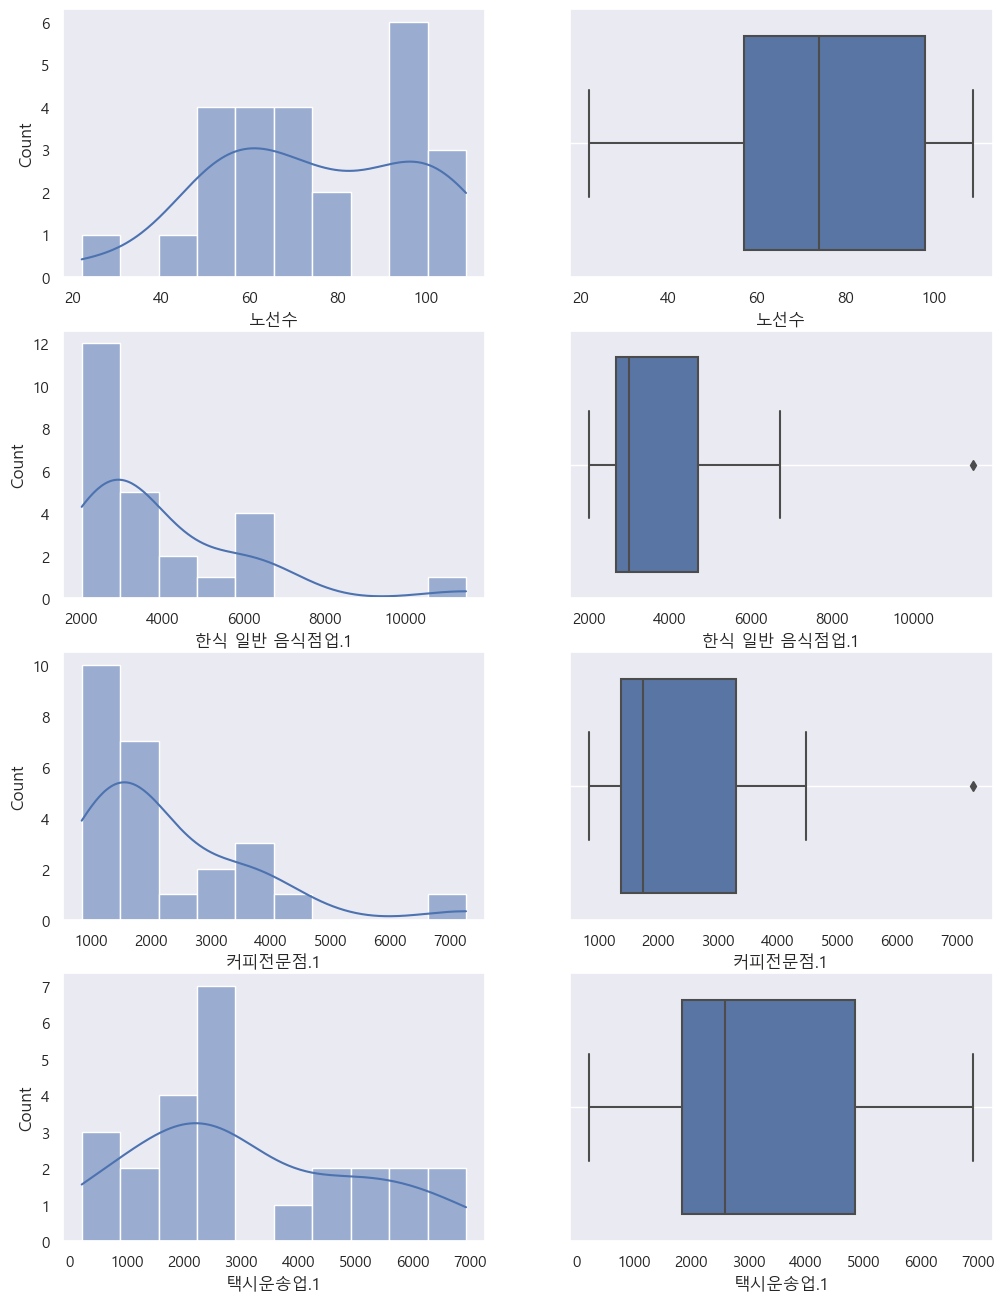

In [105]:
var_list = ['노선수', '한식 일반 음식점업.1', '커피전문점.1', '택시운송업.1']#업종
var_list
eda_1_num(df, var_list, bins = 10)

- 노선수: 60 ~ 100개 많음
- 한식 일반 음식점: 2000 ~ 4000개에 대부분 분포
- 커피 전문점: 1000 ~ 2000개에 대부분 분포
- 택시 운송업: 2000 ~ 5000개에 대부분 분포 -> 2000 ~ 3000개가 많음


## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
    
상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음
- 음수 똑같음 

p-value 기준을 0.05로 가져죠? 5%
p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)

- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함


In [192]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix[['노선수']].sort_values('노선수', ascending=False)

,노선수
노선수,1.000000
승차총승객수,0.692430
하차총승객수,0.681820
승차평균승객수/평균 이동 시간(분),0.587276
승차평균승객수,0.475907
커피전문점.1,0.469922
하차평균승객수,0.458596
한식 일반 음식점업.1,0.456328
총 이동 시간,0.389855
한식 육류요리 전문점.1,0.317833


In [167]:
corr_matrix = df_2.corr(numeric_only=True)

In [168]:
corr_matrix[['노선수']].sort_values('노선수', ascending=False)

,노선수
노선수,1.000000
커피전문점.1,0.469922
한식 일반 음식점업.1,0.456328
한식 육류요리 전문점.1,0.317833
기타주점업.1,0.289357
남녀용 겉옷 및 셔츠 도매업.1,0.281066
두발미용업.1,0.165513
부동산 중개 및 대리업.1,0.129901
일반 교과 학원.1,0.000176
도착 시군구 코드,-0.053626


1) 한식 일반 음식점업.1 -> 노선수 : 중간 상관관계
2) 커피전문점.1 -> 노선수 : 중간 상관관계
3) 택시운송업.1 -> 노선수 : 강한 상관관계

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [151]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

var_list = ['택시운송업.1', '용달 화물자동차 운송업.1']
target = '노선수'
for var in var_list:
    X = df_2[var]
    Y = df_2[target]
    statistics, pvalue = spst.pearsonr(X,Y)
    print(f'{var}: PearsonRResult(statistic={statistics}, pvalue={pvalue})')

택시운송업.1: PearsonRResult(statistic=-0.6367235949028304, pvalue=0.0006210730044211676)
용달 화물자동차 운송업.1: PearsonRResult(statistic=-0.5864045276263649, pvalue=0.002064665932155473)


- 택시운송업자들의 수가 많을수록 노선의 수가 적다
    - p-value의 값이 0.05이하로 유의미한 결과라고 할 수 있다

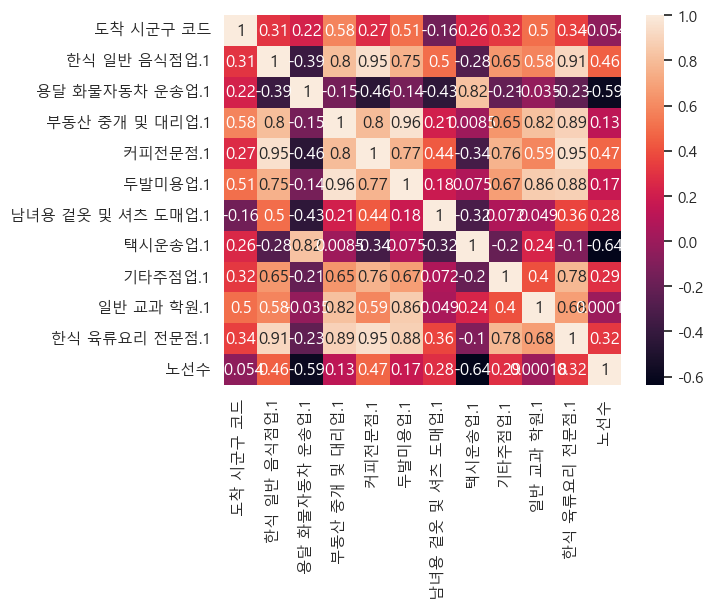

In [150]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

sns.heatmap(df_2.corr(numeric_only=True), annot = True)
plt.show()

In [165]:
def eda_num_num(features, target, data):
    plt.figure(figsize = (16, 6))
    for i in range(len(features)):
        plt.subplot(1, 2, i + 1)
        sns.regplot(x = features[i], y = target, data = data)
        plt.xticks(rotation = 45)
    plt.tight_layout()    
    plt.show()

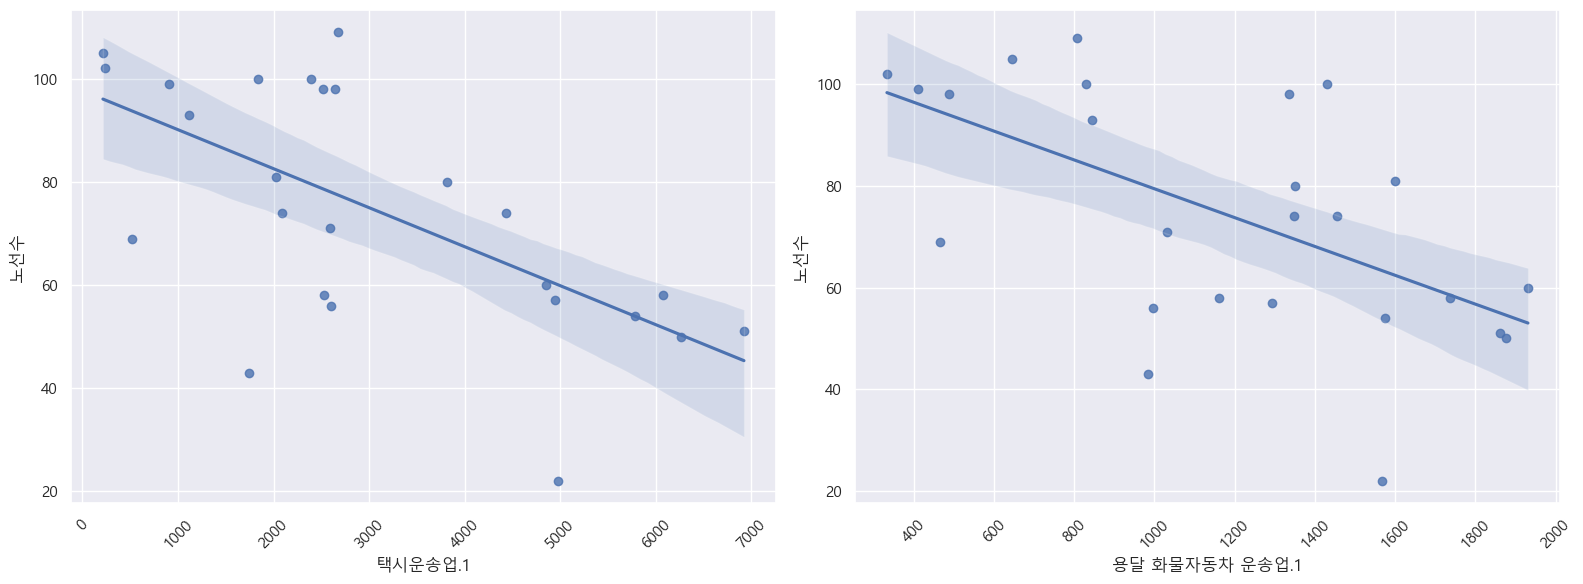

In [166]:
features, targets = ['택시운송업.1', '용달 화물자동차 운송업.1'], '노선수'

eda_num_num(features, target, df_2)

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

- 

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇일까요?
### 조원들과 상의해서 각자의 인사이트를 도출하고 발표자료를 만들어보세요.